In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib as mpl
import matplotlib.pyplot as plt

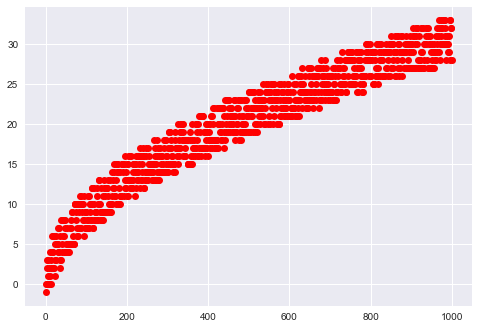

In [3]:
noiseSize = 3
size = 1000

sample = np.arange(size*2).reshape( (2, size) )
sample[1] = np.sqrt(sample)[0]
sample[1] = sample[1] + (np.random.rand(1,size) - .5) * noiseSize*2
sample = sample.T

plt.plot(sample[:,0], sample[:,1], 'ro')

In [4]:
data = sample
n = 2
m = data.shape[0]

x = data[:, :n-1]
x = np.concatenate((np.ones((1,m)), x.T)).T

y = np.array( data[:,-1] )
y = y.T

In [5]:
# # TODO: make it faster!
# scale = []

# for i in range(0,n):
#     scale.append( [x[:,i].min(), x[:,i].max(), x[:,i].mean()] )

# print( scale )

In [6]:
# for i in range(0, m):
#     for j in range(0, n):
#         x[i][j] = (x[i][j] - scale[j][2]) / (scale[j][1] - scale[j][0])

alpha: 1.0
alpha: 0.1
alpha: 0.01
alpha: 0.001
alpha: 0.0001
alpha: 1e-05
alpha: 1.0000000000000002e-06
alpha: 1.0000000000000002e-07
alpha: 1.0000000000000002e-08
alpha: 1.0000000000000003e-09
theta: [  7.08378265e-05   3.51319483e-02]


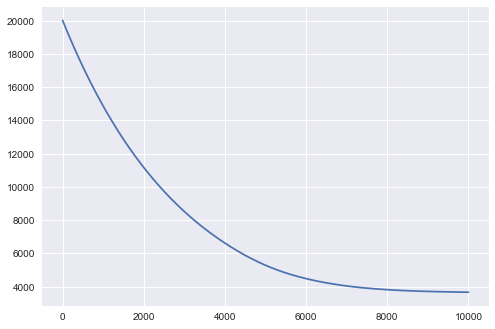

In [7]:
iterCount = 10000
alpha = 10
theta = np.array(n * [0])

j = []
complete = False

while( not complete ):
    complete = True
    for _ in range(0, iterCount):
        h = np.dot(x , theta.T).T
        loss = h - y
        gradient = np.dot(loss , x)
        theta = theta - alpha * gradient / m
        j += [ abs(np.array(loss)).sum() ]
        
        # fix big alpha
        if (j[ len(j)-1 ] > j[ len(j)-2 ]):
            complete = False
            alpha = alpha / 10
            print('alpha:', alpha)
            theta = np.array(n * [0])
            j.clear()
            break

print('theta:', theta )
plt.plot(j)

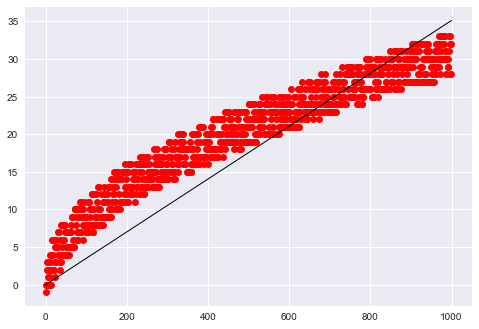

In [8]:
plt.plot(sample[:,0], sample[:,1], 'ro')
plt.plot([0, m], [0,  theta[0] + m*theta[1]], 'k-', lw=1)

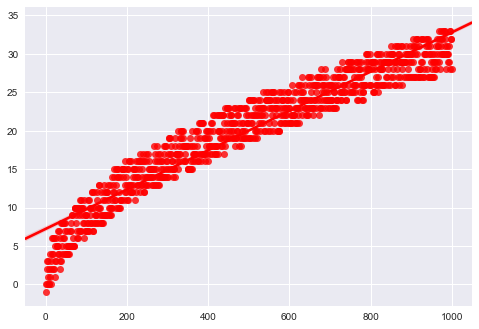

In [9]:
sns.regplot(sample[:,0], sample[:,1], color='red')